# Project : Isotherms and Henry coefficients of N2 and CO2 with different materials

#### 1) Properties of materials

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyiast as pyiast
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
#Pore analysis for Mg-MOF-74
material_data = pd.read_csv("Mg-MOF-74.csv")
print("Properties of Mg-MOF-74:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of Mg-MOF-74:
Accessible surface area: 222.828 A^2
Density: 0.886275 g/cm^3
Probe-occupiable accessible volume: 837.198 A^3
Material porosity: 0.61368


In [4]:
#pore analysis is NOTT-300
material_data = pd.read_csv("NOTT-300.csv")
print("Properties of NOTT-300:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of NOTT-300:
Accessible surface area: 453.452 A^2
Density: 1.03926 g/cm^3
Probe-occupiable accessible volume: 1297.11 A^3
Material porosity: 0.48999


In [5]:
#pore analysis of UTSA-20
material_data = pd.read_csv("UTSA-20.csv")
print("Properties of UTSA-20:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-20:
Accessible surface area: 1307.51 A^2
Density: 0.882399 g/cm^3
Probe-occupiable accessible volume: 3575.36 A^3
Material porosity: 0.62907


In [6]:
#pore analysis of UTSA-80
material_data = pd.read_csv("UTSA-80.csv")
print("Properties of UTSA-80:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-80:
Accessible surface area: 3114.62 A^2
Density: 0.678215 g/cm^3
Probe-occupiable accessible volume: 9619.78 A^3
Material porosity: 0.66798


In [7]:
#pore analysis of ZIF-8
material_data = pd.read_csv("ZIF-8.csv")
print("Properties of ZIF-8:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of ZIF-8:
Accessible surface area: 787.421 A^2
Density: 0.909567 g/cm^3
Probe-occupiable accessible volume: 2488.25 A^3
Material porosity: 0.49906


#### 2) Henry's coefficients for CO2 and N2 at 298 K

We load the Henry’s constants $K_H$ for CO₂ and N₂ at 25 °C from the CSV files to compare their gas affinities.
A higher $K_H$ indicates stronger CO₂ adsorption; we then rank the materials by decreasing $K_H(\mathrm{CO₂})$.

In [9]:
# Part 2 — Henry coefficients at 25 °C and CO2 affinity ranking (improved visuals)

import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display, Markdown

# ---------------------------------------------
# Setup
# ---------------------------------------------
base_dir = Path("CSV") if Path("CSV").exists() else Path(".")

materials = {
    "Mg-MOF-74": {"CO2": "Mg-H-CO2.csv",     "N2": "Mg-H-N2.csv"},
    "ZIF-8"    : {"CO2": "ZIF-8-H-CO2.csv",  "N2": "ZIF-8-H-N2.csv"},
    "UTSA-20"  : {"CO2": "UTSA-20-H-CO2.csv","N2": "UTSA-20-H-N2.csv"},
    "UTSA-80"  : {"CO2": "UTSA-80-H-CO2.csv","N2": "UTSA-80-H-N2.csv"},
    "NOTT-300" : {"CO2": "NOTT-H-CO2.csv",   "N2": "NOTT-H-N2.csv"},
}

# ---------------------------------------------
# Helper functions
# ---------------------------------------------
def _first_numeric(series):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if len(s) == 0:
        raise ValueError("No numeric value found")
    return float(s.iloc[0])

def parse_henry_csv(path: Path) -> tuple[float, str]:
    df = pd.read_csv(path)
    cols_l = {c.lower(): c for c in df.columns}
    key_col   = cols_l.get("key")
    value_col = cols_l.get("value")
    unit_col  = cols_l.get("unit")

    if value_col is None:
        non_key_cols = [c for c in df.columns if c != key_col]
        if not non_key_cols:
            raise ValueError(f"No value column in {path.name}")
        value_col = non_key_cols[0]

    if key_col is not None:
        mask = df[key_col].astype(str).str.contains("henry", case=False, regex=True)
        if mask.any():
            row = df.loc[mask].iloc[0]
            val = float(row[value_col])
            unit = str(row[unit_col]).strip() if unit_col in df.columns else ""
        else:
            val = _first_numeric(df[value_col])
            unit = str(df[unit_col].iloc[0]).strip() if unit_col in df.columns else ""
    else:
        numeric_vals = df.select_dtypes(include=[np.number]).stack()
        if numeric_vals.empty:
            val = _first_numeric(df.iloc[:, 0])
        else:
            val = float(numeric_vals.iloc[0])
        unit = str(df[unit_col].iloc[0]).strip() if unit_col in df.columns else ""

    return val, unit.lower()

def to_mmol_g_bar(value: float, unit: str) -> float:
    if unit == "" or ("mol/kg" in unit and "/bar" in unit):
        return value
    if "mmol/g" in unit and "/bar" in unit:
        return value
    if "mol/kg" in unit and "/pa" in unit:
        return value * 1e5
    if "mol/kg" in unit and "/atm" in unit:
        return value / 1.01325
    if "/pa" in unit:
        return value * 1e5
    return value

def read_henry_mmol_g_bar(path: Path) -> float:
    raw, unit = parse_henry_csv(path)
    return to_mmol_g_bar(raw, unit)

# ---------------------------------------------
# Main computation
# ---------------------------------------------
rows, notes = [], []
for mat, f in materials.items():
    try:
        kh_co2 = read_henry_mmol_g_bar(base_dir / f["CO2"])
    except Exception as e:
        kh_co2 = np.nan
        notes.append(f"{mat} CO2: {e}")
    try:
        kh_n2  = read_henry_mmol_g_bar(base_dir / f["N2"])
    except Exception as e:
        kh_n2 = np.nan
        notes.append(f"{mat} N2: {e}")

    rows.append({
        "Material": mat,
        "KH_CO2 [mmol·g⁻¹·bar⁻¹]": kh_co2,
        "KH_N2 [mmol·g⁻¹·bar⁻¹]": kh_n2
    })

henry = pd.DataFrame(rows).set_index("Material")
henry["Selectivity_inf_dil (KH_CO2/KH_N2)"] = henry["KH_CO2 [mmol·g⁻¹·bar⁻¹]"] / henry["KH_N2 [mmol·g⁻¹·bar⁻¹]"]

rank_affinity = henry.sort_values("KH_CO2 [mmol·g⁻¹·bar⁻¹]", ascending=False)
rank_ratio    = henry.sort_values("Selectivity_inf_dil (KH_CO2/KH_N2)", ascending=False)

# ---------------------------------------------
# Display (Styled tables)
# ---------------------------------------------
# --- DARK MODE DISPLAY (better contrast) ---

# Global title
display(Markdown("### Henry coefficients (25 °C) — Units: mmol·g⁻¹·bar⁻¹"))

# Main table
styled = (
    henry.style
    .format({
        "KH_CO2 [mmol·g⁻¹·bar⁻¹]": "{:.6f}",
        "KH_N2 [mmol·g⁻¹·bar⁻¹]": "{:.6f}",
        "Selectivity_inf_dil (KH_CO2/KH_N2)": "{:.2f}"
    })
    .set_caption("Henry coefficients and infinite-dilution selectivity")
    .set_table_styles([
        {"selector": "caption", "props": [("font-weight", "bold"), ("text-align", "center"), ("color", "#9cdcfe"), ("font-size", "15px")]},
        {"selector": "th", "props": [("background-color", "#1e1e1e"), ("color", "#dcdcdc"), ("text-align", "center"), ("border", "1px solid #444")]},
        {"selector": "td", "props": [("background-color", "#252526"), ("color", "#eaeaea"), ("text-align", "center"), ("border", "1px solid #333")]}
    ])
)
display(styled)

# Ranking by CO2 affinity
display(
    rank_affinity[["KH_CO2 [mmol·g⁻¹·bar⁻¹]"]]
    .style.format("{:.6f}")
    .set_caption("Ranking by CO₂ affinity (descending K_H(CO₂))")
    .set_table_styles([
        {"selector": "caption", "props": [("font-weight", "bold"), ("text-align", "center"), ("color", "#4ec9b0"), ("font-size", "14px")]},
        {"selector": "th", "props": [("background-color", "#1e1e1e"), ("color", "#dcdcdc"), ("text-align", "center"), ("border", "1px solid #444")]},
        {"selector": "td", "props": [("background-color", "#252526"), ("color", "#eaeaea"), ("text-align", "center"), ("border", "1px solid #333")]}
    ])
)

# Ranking by selectivity
display(
    rank_ratio[["Selectivity_inf_dil (KH_CO2/KH_N2)"]]
    .style.format("{:.2f}")
    .set_caption("Ranking by infinite-dilution selectivity (KH_CO₂/KH_N₂)")
    .set_table_styles([
        {"selector": "caption", "props": [("font-weight", "bold"), ("text-align", "center"), ("color", "#ce9178"), ("font-size", "14px")]},
        {"selector": "th", "props": [("background-color", "#1e1e1e"), ("color", "#dcdcdc"), ("text-align", "center"), ("border", "1px solid #444")]},
        {"selector": "td", "props": [("background-color", "#252526"), ("color", "#eaeaea"), ("text-align", "center"), ("border", "1px solid #333")]}
    ])
)

### Henry coefficients (25 °C) — Units: mmol·g⁻¹·bar⁻¹

,KH_CO2 [mmol·g⁻¹·bar⁻¹],KH_N2 [mmol·g⁻¹·bar⁻¹],Selectivity_inf_dil (KH_CO2/KH_N2)
Material,,,
Mg-MOF-74,0.000087,0.000003,25.96
ZIF-8,0.000009,0.909567,0.00
UTSA-20,0.000041,0.000004,9.37
UTSA-80,0.000017,0.000003,5.11
NOTT-300,0.000185,0.000011,17.53


,KH_CO2 [mmol·g⁻¹·bar⁻¹]
Material,
NOTT-300,0.000185
Mg-MOF-74,0.000087
UTSA-20,0.000041
UTSA-80,0.000017
ZIF-8,0.000009


,Selectivity_inf_dil (KH_CO2/KH_N2)
Material,
Mg-MOF-74,25.96
NOTT-300,17.53
UTSA-20,9.37
UTSA-80,5.11
ZIF-8,0.00


### 3) Pure isotherms for CO₂ and N₂ at 25 °C

We plot the pure adsorption isotherms q(P) for CO₂ and N₂ at 25 °C using the provided CSV files.
These curves show how each MOF’s adsorption capacity changes with pressure and allow comparison between materials.

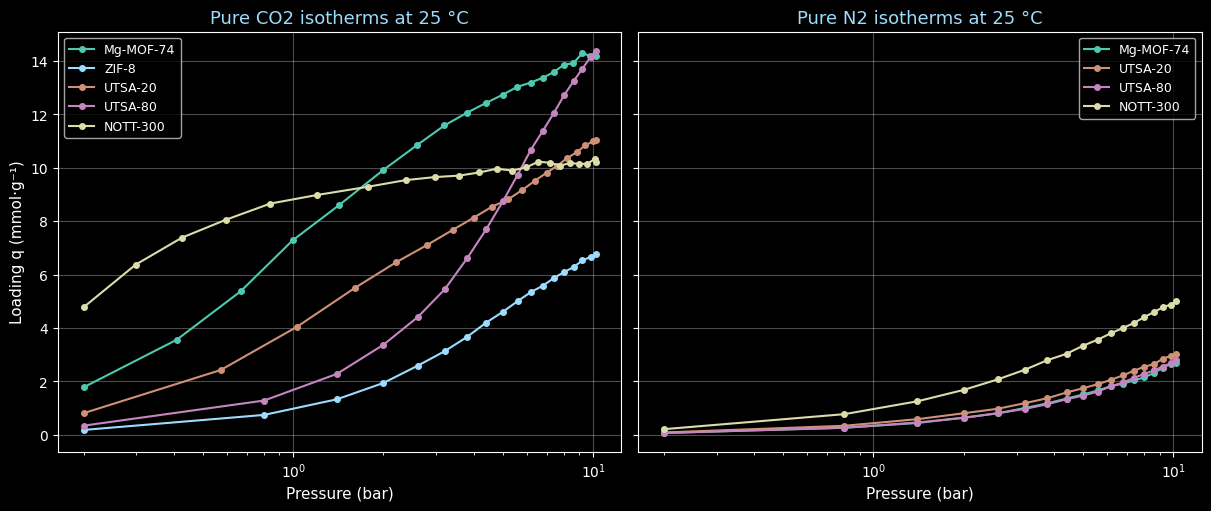

,Min P (bar),Max P (bar),Max q_CO2 (mmol·g⁻¹)
Material,,,
Mg-MOF-74,0.20,10.20,14.29
ZIF-8,0.20,10.20,6.78
UTSA-20,0.20,10.20,11.05
UTSA-80,0.20,10.20,14.38
NOTT-300,0.20,10.20,10.34


Plotted from files:
 • Mg-MOF-74 CO2: Mg-P-CO2.csv
 • ZIF-8 CO2: ZIF-8-P-CO2.csv
 • UTSA-20 CO2: UTSA-20-P-CO2.csv
 • UTSA-80 CO2: UTSA-80-P-CO2.csv
 • NOTT-300 CO2: NOTT-P-CO2.csv
 • Mg-MOF-74 N2: Mg-P-N2.csv
 • UTSA-20 N2: UTSA-20-P-N2.csv
 • UTSA-80 N2: UTSA-80-P-N2.csv
 • NOTT-300 N2: NOTT-P-N2.csv

Skipped:
 • ZIF-8 N2: 'isotherm' key not found in ZIF-8-P-N2.csv


In [15]:
# Part 3 — Pure isotherms for CO2 and N2 at 25 °C (parsing embedded JSON in CSV)

import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, ast
from pathlib import Path
from IPython.display import display, Markdown

warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

base_dir = Path("CSV") if Path("CSV").exists() else Path(".")
materials = ["Mg-MOF-74", "ZIF-8", "UTSA-20", "UTSA-80", "NOTT-300"]

def find_file(mat: str, gas: str) -> Path|None:
    # noms possibles dans ton dossier
    candidates = [
        f"{mat}-P-{gas}.csv",
        f"{mat.split('-')[0]}-P-{gas}.csv",
        f"{mat.split('-')[0].upper()}-P-{gas}.csv",
    ]
    for name in candidates:
        p = base_dir / name
        if p.exists():
            return p
    return None

def read_isotherm_from_csv(path: Path) -> pd.DataFrame:
    """Lit la ligne 'isotherm' et parse la valeur JSON -> DataFrame Pressure/Loading."""
    df = pd.read_csv(path)
    # chercher la ligne avec Key == 'isotherm'
    row = df.loc[df['Key'].astype(str).str.lower().eq('isotherm')]
    if row.empty:
        raise ValueError(f"'isotherm' key not found in {path.name}")
    payload = row['Value'].iloc[0]
    # parser le dict stocké en texte
    data = ast.literal_eval(payload)
    P = np.asarray(data['pressure'], dtype=float)  # en bar
    q_molkg = np.asarray(data['loading_absolute_average'], dtype=float)  # en mol/kg
    # conversion numériquement 1:1 vers mmol/g
    q_mmolg = q_molkg  # 1 mol/kg = 1 mmol/g
    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻¹)": q_mmolg})
    return out.sort_values("Pressure (bar)")

# ---- Tracé ----
plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True, constrained_layout=True)
palette = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa"]

used, skipped = [], []

for i, gas in enumerate(["CO2","N2"]):
    ax = axes[i]
    for mat, color in zip(materials, palette):
        path = find_file(mat, gas)
        if path is None:
            skipped.append(f"{mat} {gas}: file not found")
            continue
        try:
            d = read_isotherm_from_csv(path)
            ax.plot(d["Pressure (bar)"], d["Loading (mmol·g⁻¹)"], marker="o", ms=4, label=mat, color=color)
            used.append(f"{mat} {gas}: {path.name}")
        except Exception as e:
            skipped.append(f"{mat} {gas}: {e}")
    ax.set_xscale("log")
    ax.set_xlabel("Pressure (bar)", fontsize=11)
    if i==0: ax.set_ylabel("Loading q (mmol·g⁻¹)", fontsize=11)
    ax.set_title(f"Pure {gas} isotherms at 25 °C", fontsize=13, color="#9cdcfe")
    ax.grid(alpha=0.3); ax.legend(fontsize=9)

plt.show()

# ---- Tableau résumé (CO2) ----
rows=[]
for mat in materials:
    p = find_file(mat, "CO2")
    if p is None:
        rows.append({"Material": mat, "Min P (bar)": np.nan, "Max P (bar)": np.nan, "Max q_CO2 (mmol·g⁻¹)": np.nan})
        continue
    try:
        d = read_isotherm_from_csv(p)
        rows.append({"Material": mat,
                     "Min P (bar)": d["Pressure (bar)"].min(),
                     "Max P (bar)": d["Pressure (bar)"].max(),
                     "Max q_CO2 (mmol·g⁻¹)": d["Loading (mmol·g⁻¹)"].max()})
    except Exception:
        rows.append({"Material": mat, "Min P (bar)": np.nan, "Max P (bar)": np.nan, "Max q_CO2 (mmol·g⁻¹)": np.nan})

iso_summary = pd.DataFrame(rows).set_index("Material")
for c in ["Min P (bar)","Max P (bar)","Max q_CO2 (mmol·g⁻¹)"]:
    iso_summary[c] = pd.to_numeric(iso_summary[c], errors="coerce")

styled = (iso_summary.style
    .format({"Min P (bar)":"{:.2f}","Max P (bar)":"{:.2f}","Max q_CO2 (mmol·g⁻¹)":"{:.2f}"})
    .set_caption("Pure CO₂ isotherm summary — Units: bar, mmol·g⁻¹")
    .set_table_styles([
        {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),("color","#9cdcfe"),("font-size","14px")]},
        {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),("text-align","center"),("border","1px solid #444")]},
        {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),("text-align","center"),("border","1px solid #333")]}
    ]))
display(styled)

# Logs utiles
if used:
    print("Plotted from files:")
    for s in used: print(" •", s)
if skipped:
    print("\nSkipped:")
    for s in skipped: print(" •", s)

The CO₂ isotherms show that Mg-MOF-74 and UTSA-80 have the highest adsorption capacities, followed by UTSA-20 and NOTT-300, while ZIF-8 adsorbs much less CO₂.
This indicates stronger CO₂–framework interactions in materials with open metal sites or higher pore volume.
For N₂, all materials adsorb only small amounts, confirming their higher affinity for CO₂.
